ValueError: Argument Z must be 2-dimensional.

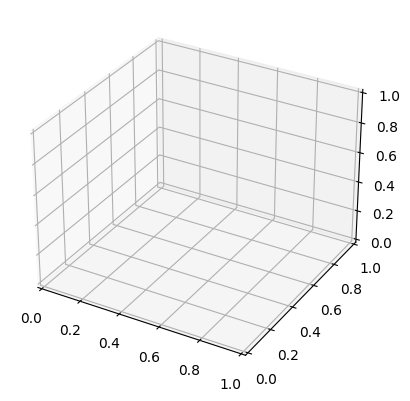

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm, genlaguerre

# Define quantum numbers
n = 3  # Principal quantum number
l = 2  # Azimuthal quantum number
ml = 1  # Magnetic quantum number
r = np.linspace(0, 10, 100)
theta, phi = np.linspace(0, np.pi, 100), np.linspace(0, 2 * np.pi, 200)
laguerre_poly = genlaguerre(n-l-1, 2*l+1)(2*r/n)

# Define the radial function (you should use the actual radial wavefunction)
def radial_wavefunction(r, n, l):
    R= ((2/n)**3*(math.factorial(n-l-1)/2*n*(math.factorial(n+l))))**(1/2)*np.exp(-r/n)*(2*r/n)**l*(laguerre_poly)
    return R
R, Theta, Phi = np.meshgrid(radial_wavefunction(r, n, l), theta, phi)
# Create a grid of spherical coordinates

# Calculate the spherical harmonic
Y_lm = sph_harm(ml, l, Theta, Phi)

# Spherical to Cartesian coordinates transformation
x = (R * np.abs(Y_lm)) * np.sin(Theta) * np.cos(Phi)
y = (R * np.abs(Y_lm)) * np.sin(Theta) * np.sin(Phi)
z = (R * np.abs(Y_lm)) * np.cos(Theta)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', rstride=1, cstride=1, alpha=0.8, linewidth=0)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Hydrogen Atom Orbital: n={n}, l={l}, ml={ml}')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
theta, phi = np.linspace(0, np.pi, 100), np.linspace(0, 2 * np.pi, 100)
Theta, Phi = np.meshgrid(theta, phi)
from scipy.special import sph_harm
# Replace l and ml with your chosen quantum numbers
l = 4
ml = 1

Y_lm = sph_harm(ml, l, Theta, Phi)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Spherical to Cartesian coordinates transformation
x = np.abs(Y_lm) * np.sin(Theta) * np.cos(Phi)
y = np.abs(Y_lm) * np.sin(Theta) * np.sin(Phi)
z = np.abs(Y_lm) * np.cos(Theta)

ax.plot_surface(x, y, z, cmap='magma')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Spherical Harmonic Y({l},{ml})')


plt.savefig("hydrogen_orbital.png")

# Enable interactive mode (for interactive rotation)
plt.ion()
# Show the plot (optional)
plt.show()


In [ ]:
import numpy
import math
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import scipy.special
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import ListedColormap
import skimage

def hydrogen_wf(n,l,m,X,Y,Z):
    R = numpy.sqrt(X**2+Y**2+Z**2)
    Theta = numpy.arccos(Z/R)
    Phi = numpy.arctan2(Y,X)
    
    rho = 2.*R/n
    s_harm=sph_harm(m, l, Phi, Theta)
    l_poly = scipy.special.genlaguerre(n-l-1,2*l+1)(rho)
    
    prefactor = numpy.sqrt((2./n)**3*math.factorial(n-l-1)/(2.*n*math.factorial(n+l)))
    wf = prefactor*numpy.exp(-rho/2.)*rho**l*s_harm*l_poly
    wf = numpy.nan_to_num(wf)
    return wf
  
dz=0.5
zmin=-10
zmax=10
x = numpy.arange(zmin,zmax,dz)
y = numpy.arange(zmin,zmax,dz)
z = numpy.arange(zmin,zmax,dz)
X,Y,Z = numpy.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space

#Change these to change which orbital to plot
n=4
l=2
m=0

data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2

R = numpy.sqrt(X**2+Y**2+Z**2)

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.15)
im = plt.imshow(data[int((0-zmin)/dz),:,:], vmin=0, vmax = numpy.max(data), extent=[zmin,zmax,zmin,zmax])
plt.colorbar()
sli = Slider(plt.axes([0.25, 0.025, 0.65, 0.03]), "Y", z[0], z[len(z)-1], valinit=0)
ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))

def update(val):
    index = int((sli.val-zmin) / dz)
    im.set_data(data[index,:,:])
    ax.set_title("Hydrogen Orbital xz Slice (y="+str("%.2f"%sli.val)+"): n="+str(n)+", l="+str(l)+", m="+str(m))
       
sli.on_changed(update)
plt.show()

In [ ]:
import numpy
import math
import matplotlib.pyplot as plt
import scipy.special
from scipy.special import sph_harm

def hydrogen_wf(n,l,m,X,Y,Z):
    R = numpy.sqrt(X**2+Y**2+Z**2)
    Theta = numpy.arccos(Z/R)
    Phi = numpy.arctan2(Y,X)
    
    rho = 2.*R/n
    s_harm=sph_harm(m, l, Phi, Theta)
    l_poly = scipy.special.genlaguerre(n-l-1,2*l+1)(rho)
    
    prefactor = numpy.sqrt((2./n)**3*math.factorial(n-l-1)/(2.*n*math.factorial(n+l)))
    wf = prefactor*numpy.exp(-rho/2.)*rho**l*s_harm*l_poly
    wf = numpy.nan_to_num(wf)
    return wf
  
dz=0.5
zmin=-10
zmax=10
x = numpy.arange(zmin,zmax,dz)
y = numpy.arange(zmin,zmax,dz)
z = numpy.arange(zmin,zmax,dz)
X,Y,Z = numpy.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space
n=3
l=1
m=0
data = hydrogen_wf(n,l,m,X,Y,Z)
data = abs(data)**2
R = numpy.sqrt(X**2+Y**2+Z**2)

plt.figure()
plt.plot(z, data[int(len(z)/2),int(len(z)/2),:])
plt.title("$|\psi_{nlm}|^2$(x=0,y=0,z): n="+str(n)+", l="+str(l)+", m="+str(m))
plt.xlabel('z')
plt.ylabel("$|\psi_{nlm}|^2$")
plt.show()

In [ ]:
import numpy
import scipy.special
import scipy.misc
from mayavi import mlab

r = lambda x,y,z: numpy.sqrt(x**2+y**2+z**2)
theta = lambda x,y,z: numpy.arccos(z/r(x,y,z))
phi = lambda x,y,z: numpy.arctan(y/x)
#phi = lambda x,y,z: numpy.pi+numpy.select(
#	[x>0, x==0, x<0],
#	[
#		numpy.arctan(y/x),
#		.5*numpy.pi*numpy.sign(y),
#		numpy.arctan(y/x)+numpy.pi*numpy.sign(y)]
#)
a0 = 1.
R = lambda r,n,l: (2*r/n/a0)**l * numpy.exp(-r/n/a0) * scipy.special.genlaguerre(n-l-1,2*l+1)(2*r/n/a0)
WF = lambda r,theta,phi,n,l,m: R(r,n,l) * scipy.special.sph_harm(m,l,phi,theta)
absWF = lambda r,theta,phi,n,l,m: abs(WF(r,theta,phi,n,l,m))**2

x,y,z = numpy.ogrid[-24:24:55j,-24:24:55j,-24:24:55j]

mlab.figure()

#mask = numpy.select([theta(x,y,z)>numpy.pi/3.],[numpy.select([abs(phi(x,y,z))<numpy.pi/3.],[numpy.nan],default=1)],default=1)
mask = 1

for n in range(2,3):
	for l in range(1,n):
		for m in range(-l,l+1,1):
			w = absWF(r(x,y,z),theta(x,y,z),phi(x,y,z),n,l,m)
			mlab.contour3d(w*mask,contours=6,transparent=True)

mlab.colorbar()
mlab.outline()
mlab.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm

# Define quantum numbers
n = 1  # Principal quantum number
l = 0  # Azimuthal quantum number
ml = 0  # Magnetic quantum number

# Create a grid of spherical coordinates
r = np.linspace(0, 5, 100)
theta, phi = np.linspace(0, np.pi, 100), np.linspace(0, 2 * np.pi, 200)
R, Theta, Phi = np.meshgrid(r, theta, phi)

# Define a simplified radial function (1s orbital for demonstration)
R_nl = 2 * np.exp(-R)  # Simplified radial function (not normalized)

# Calculate the spherical harmonic
Y_lm = sph_harm(ml, l, Theta, Phi)

# Spherical to Cartesian coordinates transformation
x = (R_nl * np.abs(Y_lm)) * np.sin(Theta) * np.cos(Phi)
y = (R_nl * np.abs(Y_lm)) * np.sin(Theta) * np.sin(Phi)
z = R  # Radial distance

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', marker='.')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Radial Distance (Z)')
ax.set_title(f'Hydrogen Atom Orbital: n={n}, l={l}, ml={ml}')

plt.show()


In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

from sympy import lambdify, integrate, oo
from sympy.abc import r, theta, phi
from sympy.physics.hydrogen import R_nl, Psi_nlm

plt.style.use('dark_background')
mpl.rcParams['mathtext.fontset'] = 'cm'


def cart2sphe(x, y, z):
    '''
    3D Cartesian coordinates to spherical coordinates.

    input:
        x, y, z : numpy arrays
    '''
    xy2     = x**2 + y**2
    r       = np.sqrt(xy2 + z**2)    
    theta   = np.arctan2(np.sqrt(xy2), z) # the polar angle in radian angles
    phi     = np.arctan2(y, x)            # the azimuth angle in radian angles
    phi[phi < 0] += np.pi * 2             # np.arctan2 returns the angle in the range [-pi, pi]

    return r, theta, phi


################################################################################
if __name__ == "__main__":
    Nmax = 4
    nlms  = [
        (n, l, m)
        for n in range(1, Nmax+1)
        for l in range(n)
        for m in range(l+1)
    ]
    PSI  = [
        lambdify((r, phi, theta), Psi_nlm(n, l, m, r, phi, theta), 'numpy')
        for n, l, m in nlms
    ]

    ################################################################################
    # print(plt.figaspect(2 / Nmax),)
    fig = plt.figure(
        figsize=(9.6, 4.8),
        # figsize=plt.figaspect(2 / Nmax),
        dpi=300,
        constrained_layout=True
    )

    axes_array = np.zeros((Nmax, (Nmax*(Nmax+1))//2), dtype=int)
    axes_id    = 0
    for ii in range(Nmax):
        lm_sum = ((ii+1) * (ii+2)) // 2
        for jj in range(0, lm_sum):
            axes_id += 1
            axes_array[ii, -(jj+1)] = axes_id 

    axes = fig.subplot_mosaic(
        axes_array,
        empty_sentinel=0,
    )
    axes = [axes[ii+1] for ii in range(len(axes))]

    cut_planes = np.ones(len(axes), dtype=int) * 2
    ################################################################################

    for ii in range(len(axes)):
        n, l, m = nlms[ii]

        # L       = np.ceil(integrate(R_nl(n, l, r, Z=1)**2 * r**3, (r, 0, oo)) / 10) * 10
        # L       = integrate(R_nl(n, l, r, Z=1)**2 * r**3, (r, 0, oo)) * 2
        # N       = 100
        # print(n, l, L)

        if n == 1:
            L, N = 1.5*n**2 + 1.0, 100
        else:
            L, N = 1.5*n**2 + 5.0, 100

        a0, b0 = np.mgrid[
            -L:L:N*1j,
            -L:L:N*1j
        ]
        nx, ny = a0.shape
        xyz_planes_sphe = [
            cart2sphe(a0, b0, 0),
            cart2sphe(0, a0, b0),
            cart2sphe(a0, 0, b0),
        ]

        ax = axes[ii]
        ax.set_aspect(1.0)

        r0, theta, phi = xyz_planes_sphe[cut_planes[ii]]
        wfc = PSI[ii](r0, phi, theta).reshape(nx, ny)
        ax.pcolormesh(a0, b0, np.abs(wfc), cmap='magma') 

        ax.set_xlim(-L, L)
        ax.set_ylim(-L, L)

        STEP = 5
        if n == 1:
            ax.set_xticks([-2.5, 2.5])
            ax.set_yticks([-2.5, 2.5])
            ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
            ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
        else:
            ax.set_xticks([-x for x in np.arange(0, L, STEP)] + [x for x in np.arange(0, L, STEP)])
            ax.set_yticks([-x for x in np.arange(0, L, STEP)] + [x for x in np.arange(0, L, STEP)])
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        ax.text(0.05, 0.05, "({}, {}, {})".format(n, l, m), 
                fontsize='xx-small',
                ha='left', va='bottom', transform=ax.transAxes, color='w')


    fig.text(0.0, 1.00,  r'Hydrogen Wave Function',
            fontsize=28,
            ha='left', va='top', transform=fig.transFigure, color='w')

    fig.text(0.0, 0.90,  r'Probability Density',
            fontsize=20,
            ha='left', va='top', transform=fig.transFigure, color='w')

    fig.text(0.0, 0.80,  r'$ \psi_{nlm}(r,\theta,\phi) = \sqrt{ \left(\frac{2}{na_0}\right)^3\, \frac{(n-l-1)!}{2n[(n+l)!]} } e^{-r / na_0} \left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\cdot Y_l^m(\theta, \phi)$',
            fontsize='xx-large',
            ha='left', va='top', transform=fig.transFigure, color='w')

    # fig.text(0.00, 0.64,  "NOTE:\n\t1. The distance between two major ticks in the plot is $5\,a_0$,\n\t2. The number in the braces are the three quantum numbers $(n, l, m)$",
    #         fontsize='small',
    #         linespacing=1.8,
    #         ha='left', va='top', transform=fig.transFigure, color='w')

    fig.text(0.00, 0.64,  "NOTE:",
            fontsize='small',
            ha='left', va='top', transform=fig.transFigure, color='w')

    fig.text(0.00, 0.59,  "    1. The distance between two major ticks in the plot is $5\,a_0$.\n    2. The numbers in the brace are the three quantum numbers $(n,\,l,\,m).$",
            fontsize='small',
            linespacing=1.5,
            ha='left', va='top', transform=fig.transFigure, color='w')

    plt.savefig('hydro_wfc.png')

    # from subprocess import call
    # call('feh -xdF hydro_wfc.png'.split())

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm, genlaguerre

# Constants
a0 = 1.0  # Bohr radius
n = 2     # Principal quantum number
l = 1     # Angular quantum number (0 <= l < n)
m = 0     # Magnetic quantum number (-l <= m <= l)
laguerre = genlaguerre(n-l-1, 2*l+1)(2*r/(n*a0))
# Define the radial and angular functions for a hydrogen atom
def radial(n, l, r):
    # Radial part of the wavefunction for hydrogen atom
    return np.sqrt((2 / (n * a0)**3) * (math.factorial(n - l - 1)) / (2 * n * math.factorial(n + l))) * (2 * r / a0)**l * np.exp(-r / (n * a0)) * laguerre

def angular(l, m, theta, phi):
    # Angular part of the wavefunction for hydrogen atom
    Yml = sph_harm(m, l, theta, phi)
    return np.abs(Yml)**2

# Create a grid of points in spherical coordinates
r = np.linspace(0, 10, 100)
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
R, Theta, Phi = np.meshgrid(r, theta, phi)

# Calculate the combined wavefunction
Psi = radial(n, l, R) * angular(l, m, Theta, Phi)**2

# Convert spherical coordinates to Cartesian coordinates
X = R * np.sin(Theta) * np.cos(Phi)
Y = R * np.sin(Theta) * np.sin(Phi)
Z = R * np.cos(Theta)

# Create the 3D probability density plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', rstride=1, cstride=1, alpha=0.8, linewidth=0)

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


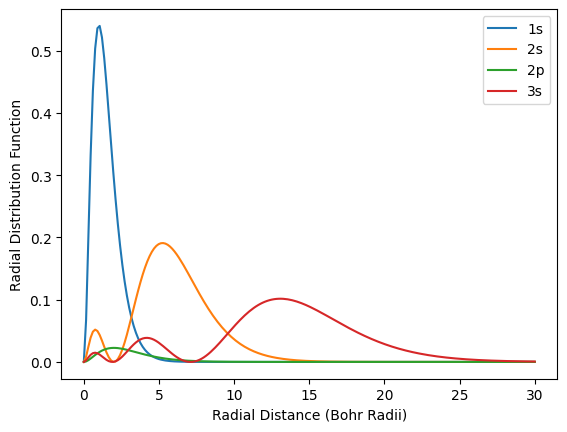

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import genlaguerre
import math

# Constants
a0 = 1.0  # Bohr radius
# 1s orbital
n = 1    # Principal quantum number
l = 0    # Angular quantum number (0 <= l < n)
# 2s orbital
n2 = 2    
l2 = 0 
# 2p orbital
n3 = 2    
l3 = 1
# 3s orbital
n4 = 3    
l4 = 0

# Create an array of radial distances
r = np.linspace(0, 30, 200)

# Calculate the Laguerre polynomial
laguerre = genlaguerre(n-l-1, 2*l+1)(2*r/(n*a0))
laguerre2 = genlaguerre(n2-l2-1, 2*l2+1)(2*r/(n2*a0))
laguerre3 = genlaguerre(n3-l3-1, 2*l3+1)(2*r/(n3*a0))
laguerre4 = genlaguerre(n4-l4-1, 2*l4+1)(2*r/(n4*a0))
# Define the radial wavefunction for a hydrogen atom
def radial_wavefunction(r, n, l):
    prefactor = np.sqrt(((2 / (n * a0))**3) * (math.factorial(n - l - 1)) / (2 * n * math.factorial(n + l)))
    exponent = np.exp(-r / (n * a0))
    return prefactor * (2 * r / (n * a0))**l * exponent * laguerre

def radial_wavefunction2(r, n2, l2):
    prefactor = np.sqrt(((2 / (n2 * a0))**3) * (math.factorial(n2 - l2 - 1)) / (2 * n2 * math.factorial(n2 + l2)))
    exponent = np.exp(-r / (n2 * a0))
    return prefactor * (2 * r / (n2 * a0))**l * exponent * laguerre2

def radial_wavefunction3(r, n3, l3):
    prefactor = np.sqrt(((2 / (n3 * a0))**3) * (math.factorial(n3 - l3 - 1)) / (2 * n3 * math.factorial(n3 + l3)))
    exponent = np.exp(-r / (n3 * a0))
    return prefactor * (2 * r / (n3 * a0))**l * exponent * laguerre3

def radial_wavefunction4(r, n2, l2):
    prefactor = np.sqrt(((2 / (n4 * a0))**3) * (math.factorial(n4 - l4 - 1)) / (2 * n4 * math.factorial(n4 + l4)))
    exponent = np.exp(-r / (n4 * a0))
    return prefactor * (2 * r / (n4 * a0))**l * exponent * laguerre4

# Calculate the radial distribution function (RDF)
rdf = (r**2) * (radial_wavefunction(r, n, l)**2)
rdf2 = (r**2) * (radial_wavefunction2(r, n2, l2)**2)
rdf3 = (r**2) * (radial_wavefunction3(r, n3, l3)**2)
rdf4 = (r**2) * (radial_wavefunction4(r, n4, l4)**2)
# Create a plot of the RDF
plt.plot(r, rdf, label='1s')
plt.plot(r, rdf2, label='2s')
plt.plot(r, rdf3, label='2p')
plt.plot(r, rdf4, label='3s')
plt.xlabel('Radial Distance (Bohr Radii)')
plt.ylabel('Radial Distribution Function')
plt.legend()
plt.savefig('RDF.png')
plt.show()


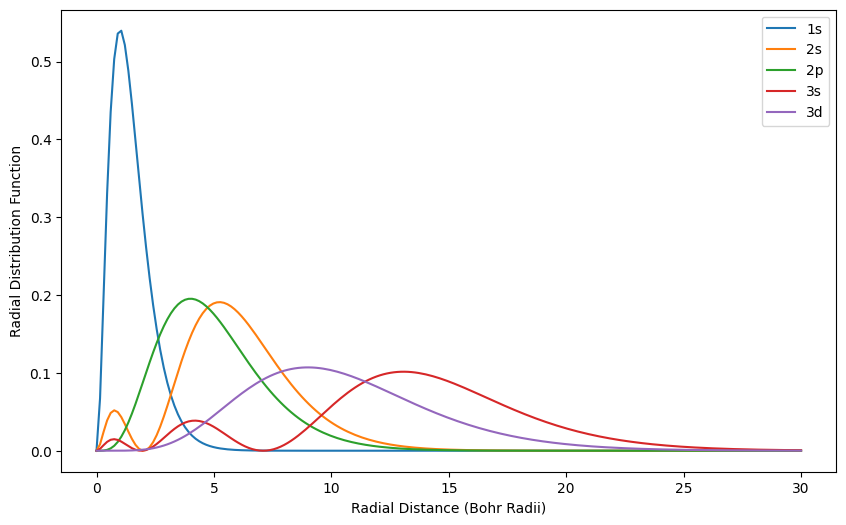

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import genlaguerre
import math

# Constants
a0 = 1.0  # Bohr radius
r = np.linspace(0, 30, 200)

def radial_wavefunction(r, n, l):
    laguerre = genlaguerre(n - l - 1, 2 * l + 1)(2 * r / (n * a0))
    prefactor = np.sqrt(((2 / (n * a0))**3) * (math.factorial(n - l - 1)) / (2 * n * math.factorial(n + l)))
    exponent = np.exp(-r / (n * a0))
    return prefactor * (2 * r / (n * a0))**l * exponent * laguerre

def radial_distribution_function(r, n, l):
    return (r**2) * (radial_wavefunction(r, n, l)**2)

# Define the quantum numbers for the orbitals
orbitals = [
    {'n': 1, 'l': 0, 'label': '1s'},
    {'n': 2, 'l': 0, 'label': '2s'},
    {'n': 2, 'l': 1, 'label': '2p'},
    {'n': 3, 'l': 0, 'label': '3s'},
    {'n': 3, 'l': 2, 'label': '3d'},
]

# Plot all the RDFs in one diagram
plt.figure(figsize=(10, 6))
for orbital in orbitals:
    rdf = radial_distribution_function(r, orbital['n'], orbital['l'])
    plt.plot(r, rdf, label=orbital['label'])

plt.xlabel('Radial Distance (Bohr Radii)')
plt.ylabel('Radial Distribution Function')
plt.legend()
plt.savefig('RDF.png')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from scipy.special import genlaguerre

# Constants
a0 = 1.0  # Bohr radius
n = 2     # Principal quantum number
l = 1     # Angular quantum number (0 <= l < n)
ml= 0

# Create a grid of radial and angular coordinates
r = np.linspace(0, 10, 100)
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 200)
R, Theta, Phi = np.meshgrid(r, theta, phi)
laguerre = genlaguerre(n-l-1, 2*l+1)(2*r/(n*a0))

# Calculate the radial part of the wave function
radial_wavefunction = np.sqrt(((2 / (n * a0))**3) * (np.math.factorial(n - l - 1)) / (2 * n * np.math.factorial(n + l))) * (2 * r / a0)**l * np.exp(-r / (n * a0))*laguerre


# Calculate the angular part of the wave function (spherical harmonic)
# For this example, it's use the angular part for l=1, m=0 (2p orbital)
Y_lm = sph_harm(ml, l, Theta, Phi)
angular_wavefunction = Y_lm

# Calculate the total wave function as a product of radial and angular parts
total_wavefunction = radial_wavefunction * angular_wavefunction

# Create a contour plot of the total wave function
plt.contourf(r, theta, np.abs(total_wavefunction)**2, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.xlabel('Radial Distance (Bohr Radii)')
plt.ylabel('Theta Angle')
plt.title(f'Total Wave Function of Hydrogen Atom: n={n}, l={l}, ')
plt.show()


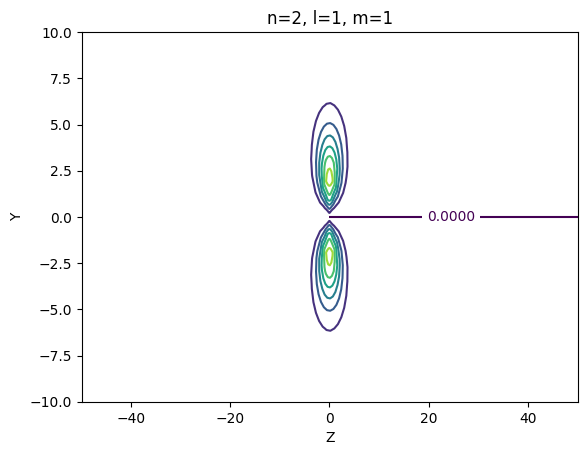

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
import sympy as sym
from sympy import *
import mpl_toolkits.mplot3d.axes3d as axes3d
import cmath

a = 1

def sph_harm(l,m):
    th = sym.Symbol('theta')
    if m>=0:
        return ((-1)**m)*np.sqrt(((2*l + 1)*np.math.factorial(l-abs(m)))/((4*np.pi)*np.math.factorial(l+abs(m))))*(-sym.functions.special.polynomials.assoc_legendre(l,m,cos(th)))
    elif m<0:
        return np.sqrt(((2*l + 1)*np.math.factorial(l-abs(m)))/((4*np.pi)*np.math.factorial(l+abs(m))))*(-sym.functions.special.polynomials.assoc_legendre(l,abs(m),cos(th)))

def radial(n,l):
    r = sym.Symbol('r')
    return np.sqrt(((2/(n*a))**3)*np.math.factorial(n-l-1)/((2*n)*(np.math.factorial(n+l)))) *sym.functions.elementary.exponential.exp(-r/(n*a))* ((2*r/(n*a))**l) * sym.functions.special.polynomials.assoc_laguerre(n-l-1,2*l+1,(2*r/(n*a)))  

theta = sym.Symbol('theta')

n = 2
l = 1
m = 1

def wave_fun(n,l,m):
    return simplify(radial(n,l))*simplify(sph_harm(l,m))

def prob(n,l,m):
    return (simplify(radial(n,l))*simplify(sph_harm(l,m)))**2

N = 50
r_max = 50
th_max = 2*np.pi

r_v = np.linspace(0,r_max,N)
th = np.linspace(0,th_max,N)

theta = sym.Symbol('theta')
r = sym.Symbol('r')

R,Th = np.meshgrid(r_v,th)
X = R*np.cos(Th)
Y = R*np.sin(Th)

Z = np.zeros([N,N]) 

expr = prob(n,l,m)
for i in range(N):
    for j in range(N):
        Z[i][j] = expr.subs([ (r,R[i][j]), (theta,Th[i][j]) ])

ax = plt.axes()
cp = ax.contour(X, Y, Z)
ax.clabel(cp, inline=True,fontsize=10)
ax.set_ylim(-2,2)
ax.set_ylim(-10,10)
ax.set_title("n="+str(n)+", l="+str(l)+", m="+str(m))
ax.set_xlabel('Z')
ax.set_ylabel('Y')
plt.show()